In [9]:
import cv2
import matplotlib
matplotlib.use('TkAgg')  # Set Tkinter as the backend
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.patches import Rectangle
import tkinter as tk
from tkinter import messagebox

slots = []
drawing = False
start_point = None
rect_patch = None

# Load image (update path to your image location)
image_path = "../data/sample_image.png"  # Adjust this path
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Create Tkinter window
root = tk.Tk()
root.title("Parking Slot Detector")

# Create matplotlib figure and axis
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(img)
ax.set_title("Click and drag to draw parking slots")

# Embed matplotlib figure in Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack()

# Mouse handlers
def on_press(event):
    global drawing, start_point, rect_patch
    if event.inaxes:
        drawing = True
        start_point = (int(event.xdata), int(event.ydata))
        rect_patch = Rectangle(start_point, 0, 0, linewidth=3, edgecolor='green', facecolor='green', alpha=0.3)
        ax.add_patch(rect_patch)
        canvas.draw()

def on_motion(event):
    global rect_patch
    if drawing and event.inaxes and rect_patch:
        x0, y0 = start_point
        x1, y1 = int(event.xdata), int(event.ydata)
        rect_patch.set_width(x1 - x0)
        rect_patch.set_height(y1 - y0)
        canvas.draw()

def on_release(event):
    global drawing, rect_patch, slots
    if event.inaxes and rect_patch:
        drawing = False
        x0, y0 = start_point
        x1, y1 = int(event.xdata), int(event.ydata)
        x0, y0, x1, y1 = min(x0, x1), min(y0, y1), max(x0, x1), max(y0, y1)
        slots.append((x0, y0, x1, y1))
        print(f"Slot added: {(x0, y0, x1, y1)}")
        rect_patch = None

# Clear slots button function
def clear_slots():
    global slots, rect_patch
    slots = []
    ax.clear()
    ax.imshow(img)
    ax.set_title("Click and drag to draw parking slots")
    if rect_patch:
        rect_patch.remove()
    canvas.draw()
    messagebox.showinfo("Info", "All slots cleared!")

# Add clear button
clear_button = tk.Button(root, text="Clear Slots", command=clear_slots)
clear_button.pack()

# Bind events
fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('motion_notify_event', on_motion)
fig.canvas.mpl_connect('button_release_event', on_release)

# Start the Tkinter event loop
root.mainloop()

Slot added: (739, 28, 788, 56)
Slot added: (797, 41, 842, 67)
Slot added: (797, 84, 842, 106)
Slot added: (741, 68, 786, 93)
Slot added: (795, 107, 841, 128)
Slot added: (741, 107, 791, 128)
Slot added: (794, 130, 841, 152)
Slot added: (740, 132, 792, 152)
Slot added: (792, 151, 841, 174)
Slot added: (744, 153, 792, 175)
Slot added: (794, 175, 842, 198)
Slot added: (747, 178, 792, 196)
Slot added: (795, 197, 842, 220)
Slot added: (744, 198, 792, 217)
Slot added: (796, 219, 842, 243)
Slot added: (744, 222, 791, 237)
Slot added: (796, 267, 845, 286)
Slot added: (744, 268, 794, 287)
Slot added: (795, 290, 846, 308)
Slot added: (744, 289, 792, 309)
Slot added: (794, 309, 842, 333)
Slot added: (749, 313, 791, 331)
Slot added: (799, 363, 845, 383)
Slot added: (744, 362, 794, 384)
Slot added: (794, 383, 845, 406)
Slot added: (744, 380, 792, 404)
Slot added: (796, 408, 847, 428)
Slot added: (745, 406, 794, 430)
Slot added: (794, 428, 845, 452)
Slot added: (746, 430, 794, 453)
Slot added: (797,

In [10]:
print("Final slots:", slots)

Final slots: [(739, 28, 788, 56), (797, 41, 842, 67), (797, 84, 842, 106), (741, 68, 786, 93), (795, 107, 841, 128), (741, 107, 791, 128), (794, 130, 841, 152), (740, 132, 792, 152), (792, 151, 841, 174), (744, 153, 792, 175), (794, 175, 842, 198), (747, 178, 792, 196), (795, 197, 842, 220), (744, 198, 792, 217), (796, 219, 842, 243), (744, 222, 791, 237), (796, 267, 845, 286), (744, 268, 794, 287), (795, 290, 846, 308), (744, 289, 792, 309), (794, 309, 842, 333), (749, 313, 791, 331), (799, 363, 845, 383), (744, 362, 794, 384), (794, 383, 845, 406), (744, 380, 792, 404), (796, 408, 847, 428), (745, 406, 794, 430), (794, 428, 845, 452), (746, 430, 794, 453), (797, 452, 845, 473), (746, 453, 795, 471), (796, 473, 846, 495), (747, 473, 796, 494), (745, 498, 795, 516), (797, 494, 847, 517), (796, 520, 846, 539), (745, 519, 796, 539), (796, 541, 846, 563), (744, 542, 795, 561), (799, 564, 850, 586), (797, 587, 849, 608), (746, 587, 796, 605), (744, 565, 795, 586), (795, 608, 847, 627), (74

# ‼️Restart Kernel

Thiker error

# 🧠 Model Architecture
| Layer          | Type            | Details                     |
| -------------- | --------------- | --------------------------- |
| Input          | Image (48x48x1) | Grayscale, resized to 48x48 |
| Conv2D         | 32 filters      | 3x3 kernel, ReLU activation |
| Conv2D         | 64 filters      | 3x3 kernel, ReLU activation |
| MaxPooling2D   | 2x2 pool size   |                             |
| Dropout        | 25%             | Regularization              |
| Flatten        | —               |                             |
| Dense          | 128 neurons     | ReLU activation             |
| Dropout        | 50%             | Regularization              |
| Output (Dense) | 2 neurons       | Softmax for classification  |


# ⚙️ Training Workflow
Load grayscale images from the folders.

Resize to 48×48 pixels.

- Label:

    0 = empty

    1 = occupied

    Split into training and test sets (80/20).

    Normalize pixel values to [0, 1].

    Train the CNN with categorical_crossentropy loss and adam optimizer.

# 🏃 Training Parameters
    Batch size: 64

    pochs: 50

    Validation: 20% of data

    Loss Function: Categorical Crossentropy

    Optimizer: Adam



In [ ]:
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import numpy as np
import cv2

# Paths to the training data folders for empty and occupied parking spots
training_data = [
    "../data/matchbox_cars_parkinglot/empty",
    "../data/matchbox_cars_parkinglot/occupied"
]

# Function to load images and their corresponding labels from the given directories
def load_images(training_data):
    images = []
    labels = []
    for i, folder in enumerate(training_data):
        label = i  # 0 for empty, 1 for occupied
        for filename in os.listdir(folder):
            try:
                # Read the image in grayscale
                img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
                # Resize the image to 48x48 pixels
                img = cv2.resize(img, (48, 48))
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {os.path.join(folder, filename)}: {e}")
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images(training_data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Preprocess the images: reshape and normalize
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1).astype('float32') / 255

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a sequential model
model = Sequential()
# Add convolutional and pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Output layer with softmax activation for classification
model.add(Dense(2, activation='softmax'))

# Compile the model with categorical crossentropy loss and adam optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Train the model with training data
model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_data=(X_test, y_test))

# Save the trained model to a file
model.save("../models/emptyparkingspotdetectionmodel.h5")

c:\Users\rcbes\miniconda3\envs\geo_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.6514 - loss: 0.5932 - val_accuracy: 0.8757 - val_loss: 0.2929
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.9118 - loss: 0.2329 - val_accuracy: 0.9306 - val_loss: 0.1821
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9483 - loss: 0.1475 - val_accuracy: 0.9740 - val_loss: 0.1019
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.9538 - loss: 0.1037 - val_accuracy: 0.9595 - val_loss: 0.0934
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9706 - loss: 0.0913 - val_accuracy: 0.9393 - val_loss: 0.1354
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9617 - loss: 0.1002 - val_accuracy: 0.9711 - val_loss: 0.0763
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9724 - loss: 0.0754 - val_accuracy: 0.9595 - val_loss: 0.0826
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9695 - loss: 0.0741 - val_accuracy: 0.930

# 📊 Model Evaluation

Now that the model is trained and saved, let's evaluate its performance on the test set (`X_test`, `y_test`).  
We'll check the accuracy, loss, and visualize predictions to understand how well the model distinguishes between empty and occupied parking spots.

Image dimensions: (750, 1418, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction for spot (124, 48, 174, 68): [0.9978466  0.00215335]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction for spot (125, 71, 178, 92): [6.1887977e-06 9.9999380e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction for spot (126, 94, 173, 115): [3.6488944e-11 1.0000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction for spot (125, 119, 175, 142): [9.2692369e-07 9.9999905e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for spot (125, 143, 175, 165): [0.9967006  0.00329936]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction for spot (126, 167, 174, 187): [3.9550915e-08 1.0000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction for spot (126, 188, 180, 210): [0.95550644 0.04449355]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for spot (128, 210, 179, 231): [0.99803084 0.0019692 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for spot (128, 233, 179, 255): [2.6169368e-25 1.0000000e+00]
1/1 ━━

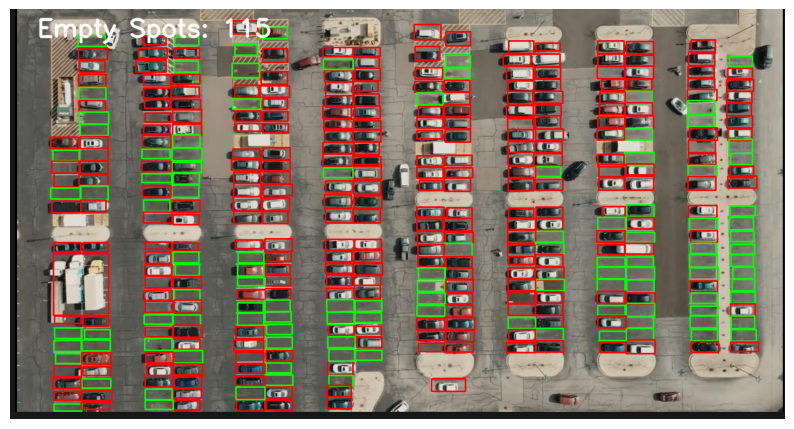

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the pre-trained Keras model
model = load_model("../models/emptyparkingspotdetectionmodel.h5")

# List of parking spot coordinates (invalid coordinate removed)
coordinates = [
    (124, 48, 174, 68), (125, 71, 178, 92), (126, 94, 173, 115), (125, 119, 175, 142),
    (125, 143, 175, 165), (126, 167, 174, 187), (126, 188, 180, 210), (128, 210, 179, 231),
    (128, 233, 179, 255), (125, 255, 179, 277), (78, 258, 126, 277), (74, 234, 125, 255),
    (126, 278, 179, 301), (76, 278, 128, 300), (80, 300, 126, 325), (126, 303, 179, 322),
    (128, 323, 179, 348), (74, 327, 129, 347), (76, 351, 129, 372), (129, 349, 175, 372),
    (134, 427, 179, 444), (80, 427, 129, 444), (79, 447, 180, 560), (133, 563, 180, 580),
    (136, 586, 183, 603), (81, 583, 130, 602), (81, 561, 130, 575), (131, 605, 183, 625),
    (80, 606, 130, 626), (83, 630, 130, 648), (131, 628, 184, 649), (133, 654, 184, 670),
    (80, 652, 130, 674), (131, 676, 184, 693), (78, 672, 129, 694), (130, 697, 186, 716),
    (81, 699, 131, 715), (80, 722, 131, 735), (130, 719, 183, 732), (301, 51, 345, 66),
    (242, 49, 285, 65), (301, 71, 346, 90), (300, 95, 344, 115), (334, 132, 348, 139),
    (244, 120, 294, 140), (294, 142, 346, 161), (244, 144, 294, 164), (295, 119, 347, 137),
    (294, 165, 348, 183), (246, 165, 292, 181), (297, 184, 350, 208), (247, 190, 294, 206),
    (297, 210, 350, 231), (244, 212, 292, 228), (297, 230, 347, 253), (242, 231, 294, 254),
    (296, 254, 351, 277), (241, 256, 292, 273), (296, 280, 350, 299), (241, 278, 294, 297),
    (298, 300, 346, 321), (241, 301, 295, 317), (295, 320, 345, 344), (242, 323, 294, 343),
    (294, 349, 347, 371), (244, 349, 292, 370), (298, 375, 345, 394), (244, 371, 296, 391),
    (297, 428, 344, 442), (247, 426, 295, 439), (298, 444, 345, 464), (247, 444, 294, 465),
    (302, 467, 346, 487), (246, 467, 296, 487), (298, 489, 350, 510), (247, 489, 295, 510),
    (300, 513, 347, 533), (245, 514, 296, 533), (230, 93, 285, 115), (235, 71, 287, 90),
    (300, 532, 350, 556), (247, 534, 298, 555), (297, 559, 348, 578), (245, 559, 298, 576),
    (298, 578, 351, 600), (247, 582, 297, 599), (296, 603, 347, 622), (298, 624, 352, 647),
    (248, 627, 298, 647), (246, 602, 296, 624), (298, 649, 352, 669), (250, 650, 297, 670),
    (247, 670, 298, 691), (300, 671, 350, 693), (298, 694, 350, 711), (247, 695, 296, 714),
    (296, 715, 347, 733), (247, 715, 298, 732), (407, 21, 453, 45), (462, 33, 507, 54),
    (462, 72, 507, 97), (459, 114, 507, 137), (455, 140, 511, 161), (462, 164, 507, 183),
    (462, 187, 508, 205), (462, 209, 509, 226), (411, 209, 461, 223), (411, 186, 459, 205),
    (407, 164, 458, 183), (411, 139, 457, 161), (406, 99, 456, 125), (411, 64, 452, 84),
    (461, 253, 512, 275), (407, 256, 457, 272), (459, 276, 512, 295), (405, 275, 458, 294),
    (458, 297, 512, 319), (409, 298, 458, 319), (409, 319, 459, 343), (462, 320, 516, 341),
    (461, 345, 511, 370), (408, 343, 459, 369), (462, 369, 508, 392), (409, 370, 461, 392),
    (466, 420, 516, 443), (412, 422, 462, 438), (464, 444, 514, 461), (417, 445, 464, 464),
    (467, 467, 512, 484), (416, 466, 464, 488), (467, 487, 513, 506), (416, 491, 466, 506),
    (467, 511, 513, 533), (416, 513, 467, 531), (466, 532, 512, 553), (466, 553, 514, 572),
    (469, 576, 516, 595), (469, 600, 516, 620), (468, 624, 517, 644), (468, 647, 514, 665),
    (466, 669, 517, 688), (467, 691, 516, 711), (468, 715, 517, 733), (414, 713, 466, 735),
    (413, 691, 466, 714), (412, 671, 466, 688), (413, 649, 466, 666), (413, 627, 464, 648),
    (409, 605, 464, 624), (413, 580, 464, 602), (416, 556, 464, 578), (416, 537, 463, 555),
    (572, 70, 627, 87), (628, 70, 677, 86), (628, 88, 675, 108), (631, 108, 677, 131),
    (628, 132, 673, 150), (629, 155, 675, 177), (630, 177, 677, 200), (629, 204, 678, 221),
    (574, 201, 628, 222), (572, 177, 624, 200), (577, 158, 627, 179), (577, 133, 627, 158),
    (575, 111, 627, 133), (573, 92, 628, 110), (627, 220, 678, 243), (575, 219, 627, 243),
    (629, 242, 675, 266), (572, 244, 628, 265), (627, 269, 678, 288), (572, 264, 627, 287),
    (628, 284, 679, 311), (573, 290, 627, 308), (628, 314, 678, 338), (577, 314, 627, 334),
    (629, 341, 680, 364), (575, 339, 624, 365), (628, 366, 677, 391), (577, 364, 627, 391),
    (630, 421, 679, 439), (577, 421, 629, 441), (629, 441, 680, 464), (627, 465, 681, 486),
    (577, 465, 628, 483), (577, 442, 625, 462), (629, 487, 678, 505), (579, 486, 625, 506),
    (630, 505, 677, 530), (579, 510, 629, 531), (631, 533, 680, 553), (630, 555, 679, 573),
    (629, 580, 679, 599), (583, 578, 630, 597), (580, 554, 629, 577), (579, 531, 629, 554),
    (635, 600, 680, 619), (581, 599, 631, 619), (631, 624, 680, 642), (581, 644, 627, 669),
    (583, 622, 630, 644), (583, 670, 627, 689), (580, 688, 624, 709), (580, 709, 624, 731),(739, 28, 788, 56), (797, 41, 842, 67), (797, 84, 842, 106), (741, 68, 786, 93), (795, 107, 841, 128), (741, 107, 791, 128), (794, 130, 841, 152), (740, 132, 792, 152), (792, 151, 841, 174), (744, 153, 792, 175), (794, 175, 842, 198), (747, 178, 792, 196), (795, 197, 842, 220), (744, 198, 792, 217), (796, 219, 842, 243), (744, 222, 791, 237), (796, 267, 845, 286), (744, 268, 794, 287), (795, 290, 846, 308), (744, 289, 792, 309), (794, 309, 842, 333), (749, 313, 791, 331), (799, 363, 845, 383), (744, 362, 794, 384), (794, 383, 845, 406), (744, 380, 792, 404), (796, 408, 847, 428), (745, 406, 794, 430), (794, 428, 845, 452), (746, 430, 794, 453), (797, 452, 845, 473), (746, 453, 795, 471), (796, 473, 846, 495), (747, 473, 796, 494), (745, 498, 795, 516), (797, 494, 847, 517), (796, 520, 846, 539), (745, 519, 796, 539), (796, 541, 846, 563), (744, 542, 795, 561), (799, 564, 850, 586), (797, 587, 849, 608), (746, 587, 796, 605), (744, 565, 795, 586), (795, 608, 847, 627), (747, 611, 795, 626), (771, 676, 833, 699), (962, 62, 1006, 76), (912, 58, 958, 81), (953, 82, 1006, 105), (902, 83, 953, 103), (960, 106, 1007, 127), (908, 105, 957, 129), (958, 128, 1007, 150), (911, 131, 958, 150), (956, 150, 1011, 172), (910, 150, 958, 175), (961, 175, 1008, 195), (908, 176, 957, 197), (958, 195, 1007, 219), (910, 200, 961, 220), (961, 219, 1012, 239), (911, 220, 957, 240), (960, 242, 1010, 262), (911, 242, 960, 262), (958, 264, 1010, 286), (911, 262, 958, 287), (961, 288, 1007, 306), (912, 286, 961, 308), (961, 311, 1011, 331), (911, 310, 958, 332), (962, 362, 1011, 382), (912, 364, 958, 382), (962, 382, 1011, 404), (910, 383, 961, 404), (960, 406, 1012, 427), (910, 403, 961, 428), (961, 426, 1013, 448), (961, 449, 1011, 472), (912, 452, 958, 467), (910, 431, 960, 452), (961, 471, 1013, 495), (911, 473, 960, 493), (962, 494, 1014, 515), (911, 494, 961, 515), (963, 517, 1011, 538), (911, 517, 960, 538), (961, 538, 1011, 560), (911, 539, 961, 560), (962, 560, 1012, 583), (911, 564, 961, 584), (962, 584, 1012, 605), (912, 586, 961, 606), (961, 606, 1012, 627), (908, 610, 962, 628), (1075, 58, 1123, 81), (1128, 59, 1177, 82), (1125, 84, 1178, 104), (1075, 82, 1123, 105), (1125, 104, 1177, 127), (1074, 105, 1124, 127), (1128, 128, 1174, 148), (1082, 128, 1124, 149), (1125, 150, 1174, 172), (1079, 151, 1125, 172), (1125, 171, 1175, 194), (1078, 172, 1124, 193), (1125, 195, 1177, 219), (1075, 197, 1124, 216), (1125, 219, 1175, 239), (1074, 219, 1124, 239), (1125, 262, 1178, 286), (1075, 266, 1123, 288), (1127, 283, 1178, 306), (1077, 284, 1127, 306), (1125, 303, 1177, 331), (1124, 331, 1124, 331), (1077, 308, 1124, 331), (1128, 358, 1178, 380), (1083, 361, 1125, 381), (1128, 381, 1178, 402), (1075, 381, 1127, 403), (1127, 408, 1179, 426), (1073, 405, 1125, 426), (1125, 428, 1177, 448), (1075, 431, 1124, 449), (1128, 453, 1177, 472), (1127, 471, 1179, 495), (1128, 495, 1178, 519), (1125, 519, 1180, 539), (1127, 538, 1179, 563), (1127, 563, 1177, 583), (1127, 584, 1177, 606), (1127, 605, 1180, 630), (1074, 454, 1125, 472), (1074, 471, 1127, 494), (1074, 493, 1125, 516), (1074, 516, 1127, 538), (1075, 542, 1125, 560), (1075, 561, 1127, 583), (1078, 589, 1127, 606), (1079, 609, 1127, 628), (1246, 56, 1290, 81), (1241, 78, 1289, 103), (1240, 104, 1288, 125), (1240, 127, 1289, 147), (1239, 147, 1293, 167), (1289, 192, 1289, 193), (1240, 167, 1289, 193), (1240, 194, 1290, 215), (1243, 217, 1294, 240), (1241, 239, 1290, 264), (1241, 262, 1291, 284), (1240, 286, 1293, 305), (1240, 306, 1291, 331), (1241, 359, 1293, 381), (1243, 382, 1294, 403), (1245, 405, 1294, 427), (1245, 428, 1293, 447), (1243, 449, 1294, 472), (1244, 473, 1296, 495), (1244, 497, 1294, 517), (1246, 519, 1295, 538), (1245, 543, 1295, 561), (1244, 560, 1293, 583), (1246, 586, 1294, 606), (1246, 608, 1296, 628), (1316, 86, 1358, 105), (1313, 108, 1358, 127), (1311, 129, 1360, 150), (1311, 150, 1357, 172), (1311, 171, 1356, 195), (1311, 195, 1358, 217), (1313, 219, 1357, 240), (1315, 238, 1358, 264), (1318, 264, 1358, 284), (1317, 287, 1360, 308), (1313, 305, 1366, 327), (1317, 360, 1363, 378), (1316, 381, 1360, 404), (1318, 406, 1361, 425), (1318, 430, 1362, 449), (1319, 448, 1360, 470), (1322, 472, 1362, 493), (1321, 494, 1362, 515), (1318, 517, 1363, 538), (1318, 539, 1363, 563), (1319, 561, 1362, 584), (1319, 586, 1365, 608), (1318, 609, 1369, 626)]

def detect_empty_parking(image, spot):
    x1, y1, x2, y2 = spot

    # Validate coordinates
    if x1 >= x2 or y1 >= y2 or x1 < 0 or y1 < 0 or x2 > image.shape[1] or y2 > image.shape[0]:
        print(f"Invalid coordinates for ROI: {spot}")
        return False

    # Extract region of interest (ROI)
    roi = image[y1:y2, x1:x2]
    if roi.size == 0:
        print(f"Empty ROI for coordinates: {spot}")
        return False

    # Process the ROI to match training preprocessing
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    resized_roi = cv2.resize(gray_roi, (48, 48))
    resized_roi = resized_roi.astype('float32') / 255
    resized_roi = np.expand_dims(resized_roi, axis=0)
    resized_roi = np.expand_dims(resized_roi, axis=-1)

    # Predict if the spot is empty
    prediction = model.predict(resized_roi)
    print(f"Prediction for spot {spot}: {prediction[0]}")  # Debug output
    return np.argmax(prediction[0]) == 0  # 0 for empty, 1 for occupied

# Read the input image
current_image = cv2.imread("../data/sample_image.png")

# Check if the image was loaded successfully
if current_image is None:
    raise FileNotFoundError("Could not load the image. Check the file path: ../data/sample_image.png")

# Print image dimensions for debugging
print(f"Image dimensions: {current_image.shape}")

empty_count = 0

# Process each parking spot
for spot in coordinates:
    if detect_empty_parking(current_image, spot):
        cv2.rectangle(current_image, (spot[0], spot[1]), (spot[2], spot[3]), (0, 255, 0), 2)
        empty_count += 1
    else:
        cv2.rectangle(current_image, (spot[0], spot[1]), (spot[2], spot[3]), (0, 0, 255), 2)

# Add text overlay
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(current_image, f"Empty Spots: {empty_count}", (50, 50), font, 1.5, (255, 255, 255), 3, cv2.LINE_AA)

# Display the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Saving Output

In [11]:
import os
import pandas as pd

# Ensure output directory exists
os.makedirs("../outputs", exist_ok=True)
cv2.imwrite("../outputs/output_detected_parking.png", current_image)

# Save CSV summary
csv_data = pd.DataFrame({
    "Total Spots": [len(coordinates)],
    "Empty Spots": [empty_count],
    "Occupied Spots": [len(coordinates) - empty_count]
})
csv_output_path = "../outputs/parking_spot_summary.csv"
csv_data.to_csv(csv_output_path, index=False)
print(f"Parking summary saved to {csv_output_path}")


Parking summary saved to ../outputs/parking_spot_summary.csv
